# Problem 1

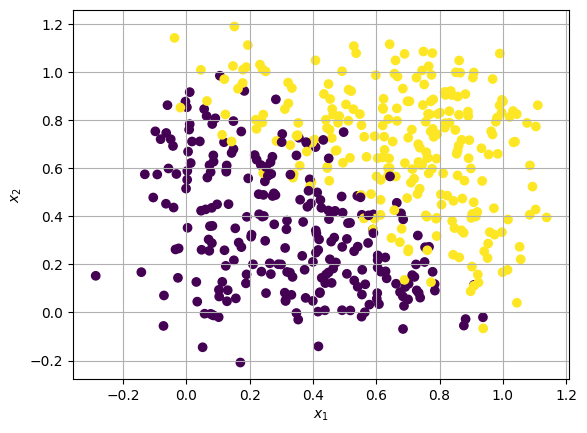

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load the dataset
with open('two_class_dataset.pkl', 'rb') as f:
    X, y = pickle.load(f) 

# Create a scatter plot the datapoints and assign a color based on the class
# note X has three rows (the first is a row of 1)
plt.scatter(X[1,:], X[2,:] , c=y)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid()
plt.show()

In [2]:
#1a and 1b

def nll(_w):
    """
    compute the logistic loss (which is equal to the negative log likelihood, or nnl)
    given a numpy array X with each column a datapoint, a list of labels, 
    and a weight vector w.  Returns a scalar. 
    """
    assert np.shape(X)[1]== len(y)
    assert np.shape(X)[0]==np.shape(_w)[0]
    _nnl = 0
    for i in range(len(y)):
        _nnl+= np.log(1+np.exp(-y[i]*(X[:,i]@_w)))
    return _nnl
    
def grad(_w): 
    """
    compute the gradient of the logistic loss given a numpy array X with each 
    column a datapoint, a list of labels, and a wieght vector w. Returns a column vector numpy array. 
    """
    assert np.shape(X)[1]== len(y)
    assert np.shape(X)[0]==np.shape(_w)[0]
    _grad_nnl = 0
    for i in range(len(y)):
        _grad_nnl+= ((-y[i])/(1+np.exp(y[i]*(X[:,i]@_w))) * X[:,i]).reshape(_w.shape)
    return _grad_nnl

In [7]:
#1c

max_its = 300
tau =.03  # convergence is sensitive to step size

w = np.zeros((3,1))  ## pick a random starting point

## run gradient descent
w_new  = w - tau*grad(w)
it = 1

while it < max_its : ### specify stopping criteria here #### and it < max_its :
    w = w_new
    w_new  = w - tau*grad(w)
    it += 1
    # print stats on every tenth iteration
    if it%10 == 0:
        print('iteration:', it, ',  objective value:', nll(w))

print(w)
print(grad(w))

iteration: 10 ,  objective value: [348.99531389]
iteration: 20 ,  objective value: [189.44304556]
iteration: 30 ,  objective value: [106.60976708]
iteration: 40 ,  objective value: [102.24921622]
iteration: 50 ,  objective value: [101.58130585]
iteration: 60 ,  objective value: [101.07965026]
iteration: 70 ,  objective value: [100.67011276]
iteration: 80 ,  objective value: [100.33231786]
iteration: 90 ,  objective value: [100.05133661]
iteration: 100 ,  objective value: [99.81590688]
iteration: 110 ,  objective value: [99.61739109]
iteration: 120 ,  objective value: [99.44906916]
iteration: 130 ,  objective value: [99.30564684]
iteration: 140 ,  objective value: [99.1829069]
iteration: 150 ,  objective value: [99.07745693]
iteration: 160 ,  objective value: [98.98654406]
iteration: 170 ,  objective value: [98.90791678]
iteration: 180 ,  objective value: [98.83972059]
iteration: 190 ,  objective value: [98.78041821]
iteration: 200 ,  objective value: [98.72872787]
iteration: 210 ,  obj

Text(0.5, 0.5, '$x2$')

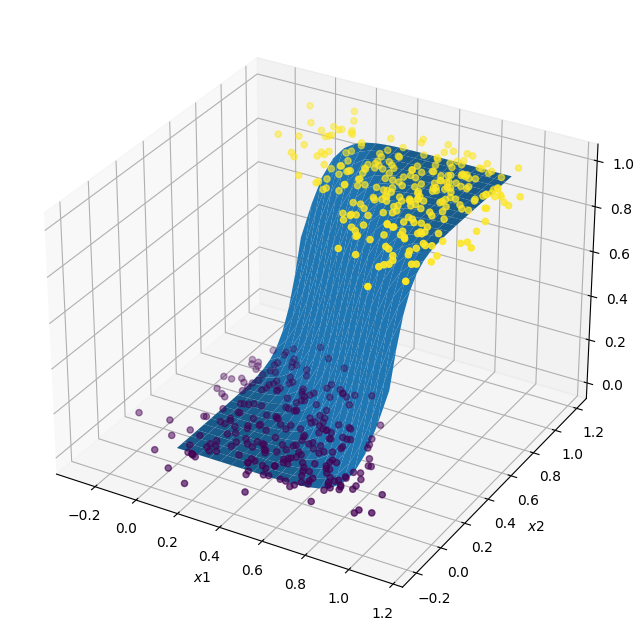

In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d

# Plot the logistic surface and the data points
xx = np.linspace(-0,1,20)
yy = np.linspace(-0,1,20)
XX,YY = np.meshgrid(xx,yy)
ZZ = 1/(1+np.exp(-(w[0]+XX*w[1]+YY*w[2])))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)
ax.scatter(X[1,:], X[2,:], (np.array(y)+1)/2, c=y)
plt.xlabel('$x1$')
plt.ylabel('$x2$')

In [5]:
#1d

prediction = 1/(1+np.exp(-X.T@w))
prediction = list((prediction[:,0]>0.5).astype(int)*2-1)
error = np.array(prediction)!=np.array(y)
error_rate = (np.sum(error)/len(y))

print(f"Error rate is {error_rate}")

Error rate is 0.098


# Problem 2

2.a) Normally, the K means involves finding the closest cluster center for each each data point
as:
$$
z_i = \text{arg}\min_k ||x_i-\mu_k||_2^2
$$
In Gaussian mixture models, the responsibility of each cluster $k$ for a data point $x_i$ is computed as
$$
r_{i,k} = \frac{\pi_k\mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum_{k'} \pi_{k'}\mathcal{N}(x_i|\mu_{k'},\Sigma_{k'})}
$$
Where we can (hard) assign each point its cluster as follows
$$
z'_i = \text{arg}\max_k r_{i,k}
$$
Assuming $\pi_k=\frac{1}{K}$ (equal weights per class) and $\Sigma_k=I$, we argue $z_i$ and $z'_i$ are equivalent as follows: first we simplify $r_{i,k}$ with the information
\begin{align*}
    r_{i,k} 
    &= \frac{\pi_k\mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum_{k'} \pi_{k'}\mathcal{N}(x_i|\mu_{k'},\Sigma_{k'})} \\
    &= \frac{\mathcal{N}(x_i|\mu_k,I)}{\sum_{k'} \mathcal{N}(x_i|\mu_{k'},I)} \\
    \log(r_{i,k}) 
    &= -(x_i-\mu_k)^T(x_i-\mu_k)+\sum_{k'}(x_i-\mu_{k'})^T(x_i-\mu_{k'})\\
    -\log(r_{i,k}) 
    &= (x_i-\mu_k)^T(x_i-\mu_k)-\sum_{k'}(x_i-\mu_{k'})^T(x_i-\mu_{k'})
\end{align*}
This means
\begin{align*}
    z'_i 
    &= \text{arg}\max_k r_{i,k} \\
    &= \text{arg}\min_k -\log(r_{i,k}) \\
    &= \text{arg}\min_k \left( (x_i-\mu_k)^T(x_i-\mu_k)-\sum_{k'}(x_i-\mu_{k'})^T(x_i-\mu_{k'}) \right) \\
    &= \text{arg}\min_k \left( (x_i-\mu_k)^T(x_i-\mu_k) \right) \\
    &= \text{arg}\min_k ||x_i-\mu_k||_2^2 \\
    &= z_i
\end{align*}
Thus, $z'_i$ and $z_i$ are equivalent, as desired.

2.b) The soft and hard assignments are nearly equivalent in cases where each clusters are extremely far apart in terms of $L_2$ distance, which means $\pi_k\mathcal{N}(x_i|\mu_k,\Sigma_k) >> \pi_{k'}\mathcal{N}(x_i|\mu_{k'},\Sigma_{k'})$ for $k'\neq k$, and thus the fraction
$$
r_{i,k} = \frac{\pi_k\mathcal{N}(x_i|\mu_k,\Sigma_k)}{\sum_{k'} \pi_{k'}\mathcal{N}(x_i|\mu_{k'},\Sigma_{k'})}
$$
can be approximated to 1. As each $r_{i,k}$ must sum up to 1, the responsibility from other clusters $k'$ can be approximated to 0.

# Problem 3

Recall that the cumulative distribution function of a random variable with pdf $f(x)$ is given by 
$$F(x) = \mathbb{P}(X\le x) = \int_{-\infty}^x f(t)dt$$

3.a) The expectation is defined as $\mathbb{E}[g(X)] = \int_{-\infty}^\infty g(t)f(t)dt$
\begin{align*}
    \mathbb{E}[\mathbb{1}\{X\le x\}] 
    &= \int_{-\infty}^\infty \mathbb{1}\{X\le x\} f(t)dt \\
    &= \int_{-\infty}^x \mathbb{1}\{X\le x\} f(t)dt + \int_{x}^\infty \mathbb{1}\{X\le x\} f(t)dt \\
    &= \int_{-\infty}^x 1 f(t)dt + \int_{x}^\infty 0 f(t)dt \\
    &= \int_{-\infty}^x f(t)dt \\
    &= F(x)
\end{align*} 

3.b) Let $X_1, X_2, \dots , X_n$ denote i.i.d. samples from $f(x)$. We define
$$
\hat{F}_n(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{X_i \le x\}
$$
Using the results from above, we can compute
\begin{align*}
    \mathbb{E}[\hat{F}_n(x)]
    &= \mathbb{E}\left[ \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{X_i \le x\} \right] \\
    &= \frac{1}{n} \sum_{i=1}^n \mathbb{E}\left[ \mathbb{1}\{X_i \le x\} \right] \\
    &= \frac{1}{n} \sum_{i=1}^n F(x) \\
    &= F(x)
\end{align*} 

3.c) As $n \hat{F}_n(x)$ is a sum of i.i.d bernoulli variables, we can see $n \hat{F}_n(x) = \sum_{i=1}^n \mathbb{1}\{X_i \le x\} \sim \text{Bin}(n, \mathbb{P}(X\le x))$. Recall that $\mathbb{P}(X\le x)=F(x)$. The variance of this binomial distribution is $\text{Var}(n \hat{F}_n(x))=n(F(x))(1-F(x))$. Therefore, 
$$
\text{Var}(\hat{F}_n(x))=\frac{1}{n^2}n(F(x))(1-F(x))=\frac{1}{n}(F(x))(1-F(x))
$$

3.d) From previous problems, $\mathbb{E}[(\hat{F}_n(x)-F_n(x))^2]=\text{Var}(\hat{F}_n(x))=\frac{1}{n}(F(x))(1-F(x))$. Denote by $p=F(x)\in[0,1]$, which means $p-\frac{1}{2}\in[-0.5,0.5]$. Consider $p(1-p)=p-p^2=\frac{1}{4}-(p-\frac{1}{2})^2\le\frac{1}{4}$. Therefore, $\mathbb{E}[(\hat{F}_n(x)-F_n(x))^2]\le\frac{1}{4n}$.